# k-means et images

On va utiliser l'algorithme des $k$-means pour réduire le nombre de couleurs d'une image.

Pour travailler avec des images en python, on a coutume utiliser la bibliothèque [pillow](https://pillow.readthedocs.io/en/stable/). Elle est normalement installée par défaut dans anaconda. 

Nous allons l'utiliser via [matplotlib](https://matplotlib.org/3.3.3/tutorials/introductory/images.html).

## données images

In [37]:
import pandas

Chargez une image quelconque. Si vous ne savez pas laquelle prendre, utilisez celle là (lol) :

In [38]:
url = "https://www.aefinfo.fr/assets/medias/documents/4/9/493038_prv.jpeg"

### matrice d'image

On va utiliser la bibliothèqye [PIL](https://pillow.readthedocs.io/en/stable/) pour charger l'image

In [39]:
import urllib
import PIL

In [40]:
image = PIL.Image.open(urllib.request.urlopen(url))

In [41]:
image.show()

Transformons l'image en matrice d'entiers :

In [42]:
import numpy as np

In [43]:
img = np.array(image)

Notre image est denevue une matrice numpy :

In [44]:
type(img)

numpy.ndarray

In [45]:
img

array([[[162, 209, 175],
        [162, 209, 175],
        [162, 209, 175],
        ...,
        [ 66,  70,  69],
        [ 69,  73,  72],
        [ 69,  73,  72]],

       [[164, 210, 181],
        [164, 210, 181],
        [165, 211, 182],
        ...,
        [ 66,  70,  69],
        [ 68,  72,  71],
        [ 68,  72,  71]],

       [[169, 214, 191],
        [169, 214, 191],
        [169, 214, 191],
        ...,
        [ 67,  71,  70],
        [ 66,  70,  69],
        [ 66,  70,  69]],

       ...,

       [[145, 147, 170],
        [180, 182, 205],
        [180, 182, 205],
        ...,
        [114,  98,  82],
        [120, 104,  88],
        [120, 104,  88]],

       [[195, 197, 218],
        [171, 173, 194],
        [160, 162, 185],
        ...,
        [116, 100,  84],
        [119, 103,  87],
        [119, 103,  87]],

       [[176, 178, 199],
        [179, 181, 202],
        [179, 181, 202],
        ...,
        [116, 100,  84],
        [119, 103,  87],
        [119, 103,  87]]

Sa *forme* est une matrice tri-dimensionelle :

In [46]:
img.shape

(554, 362, 3)

Le 1er élement de shape est le nombre de ligne, le second son nombre de ligne et le troisième la taille de l'élément (ici un pixel dont la couleur est [composée de 3 entiers (de 0 à 255)](https://en.wikipedia.org/wiki/RGB_color_model)  qui correspondent respectivement à la composante rouge, vert et bleue de la couleur).

On peut la regarder avec la fonction [imshow](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html) :

In [47]:
from matplotlib.pyplot import imshow

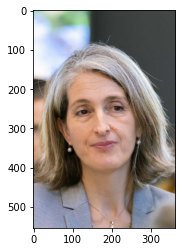

In [48]:
imshow(img)

### Accéder aux pixel 

Le pixel de la 11ème ligne et de la 4ème colonne est alors de couleur : 

In [49]:
# pixel de la 11ème ligne 4ème colonne 
img[10, 3]

array([182, 216, 228], dtype=uint8)

In [50]:
# la 11ème ligne 

img[10]

array([[182, 216, 226],
       [182, 216, 226],
       [182, 216, 226],
       ...,
       [ 65,  69,  68],
       [ 66,  70,  69],
       [ 66,  70,  69]], dtype=uint8)

In [51]:
# 4ème colonne

img[:, 3]

array([[162, 209, 175],
       [165, 211, 182],
       [170, 214, 191],
       ...,
       [166, 168, 191],
       [170, 172, 195],
       [174, 176, 197]], dtype=uint8)

### Créer une image

Créer une image est facile, il suffit de créer des matrices.

Créez, et représentez une image de 10 lignes et 34 colonnes formés de couleurs aléatoires (des listes de 3 entiers aléatoires allant de 0 à 255)

Pour celà vous pourrez utiliser :
    - [random.randint](https://docs.python.org/3/library/random.html#random.randint) pour créer des nombres aléatoires
    - créer votre matrice avec des listes python, puis créer la matrice numpy à la fin avec [numpy.array(matrice)](http://math.mad.free.fr/depot/numpy/base.html)

### un dataframe

Nos données sont donc ici les différents pixels, donc des objets décrits par 3 variables entières. Rangez-les dans une dataframe.

On pourrait créer une dataframe initialement vide et y ajouter tous les pixels un à un, mais on va faire ça plus efficacement en : 

1. créant un dataframe pour chaque ligne de la matrice et en les rangeant dans une liste (créer un dataframe est facile avec [pandas.dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Par exemple `pandas.DataFrame(data=img[0], columns=["R", "G", "B"])` crée un dataframe contenant la 1ère ligne de la matrice.
3. concaténer ces dataframe de la liste en une seule en utilisant [pandas.concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

Le nombre d'éléments du dataframe doit correspondre au nombre de lignes fois le nombre de colonnes de l'image initiale.

## k-means

### Un essai

Faites un $k$-means de votre nouveau dataframe en 10 classes, donc 10 nouvelles couleurs.

#### déterminer les centres et leur associer des couleurs

Nos nouvelles couleurs vont être les centres de gravité. Il faut donc converir ces centre en entier.

vous pourrez utiliser la méthode [astype(int)](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html) des listes de numpy.

#### voir les couleurs

Une fois nos couleurs transformées en entier, vous pourrez les représenter.

Pour cela vous pouvez considerer que si `centres` est la liste de vos centre mis sous forme entière, `[centres]` est une image de 1 ligne et de `len(centres)` coonnes. Cette image peut ainsi être vue avec la fonction `imshow` de tout à l'heure.

#### nouvelles image

Il nous reste maintenant à recolorier notre image en associant chaque pixel à sa nouvelle couleur.

Pour cela, on va 

1. créer une fonction qui calcule la distance euclidienne entre 2 couleurs. vous pourrez utiliser le fait que :
        - l'on a pas besoin de la racine carrée,
        - numpy vous aide : `v1 - v2` et `v ** 2` fonctionnent si `v1`, `v2` et `v` sont des listes numpy (ce qui est le cas de votre image en entier, ainsi que de chaque ligne, colonne ou couleur).
2. créer une fonction qui a partir d'une couleur `couleur` et d'une liste de couleurs `liste_couleur` rend la couleur de `liste_couleurs` la plus proche de `couleur`.
3. recréer une nouvelle image avec nos nouvelles couleurs en créant la matrice pixel à pixel à partir de l'image originale.

### détermination du nombre de classes

Trouvez le nombre de couleurs utiles pour votre image et refaite ce qui précède avec ce nombre.

### En changeant les couleurs

On va associer à chacune de nos nouvelles couleurs à la couleur la plus proche d'une palette de couleurs donnée. Prenons les couleurs par défaut de seaborn :

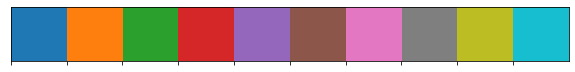

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

current_palette = sns.color_palette()
sns.palplot(current_palette) # https://seaborn.pydata.org/tutorial/color_palettes.html
plt.show()

**Attention** : si vous tapez `sns.set()`comme on le faisait habituellement, seaborn va changer la représentation par défaut des images et donc nos dessins seront moins joli.

### préparation des couleurs

On ne peut utiliser les couleurs de seaborn sans préparations. En effet, elles ne sont pas codées comme notre image :

In [53]:
current_palette[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

Ce sont des pourcentages et non des valeurs absolues. Ici la couleur à 12% de rouge, 46% green et 70% de bleue.

Convertissez notre palette en couleurs décritent par des entiers allant de 0 à 255 et représentez la avec `imshow`.

### nouvelle image

Passer notre nouvelle liste en paramètre de la création de l'image modifiée pour obtenir d'autres jeu de couleurs.

Quelle image obtient-t-on ?

On peut faire plein de variations possibles. Laissez parler le data artiste qui est en vous :-)